# Part 1: Finding the Golden Statue of Bastet

## Step 1: Define the Data Structure

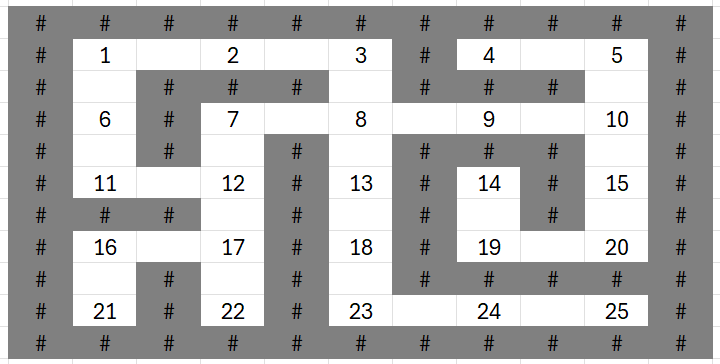

Figure 1: Modified floor plan

In [1]:
# Representing the maze as an array of strings
def createMaze():
  maze = [
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"], # top border
    ["#", "1", " ", "2", " ", "3", "#", "4", " ", "5", "#"], # row 1
    ["#", " ", "#", "#", "#", " ", "#", "#", "#", " ", "#"], # divider
    ["#", "6", "#", "7", " ", "8", " ", "9", " ", "10", "#"], # row 2
    ["#", " ", "#", " ", "#", " ", "#", "#", "#", " ", "#"], # divider
    ["#", "11", " ", "12", "#", "13", "#", "14", "#", "15", "#"], # row 3
    ["#", "#", "#", " ", "#", " ", "#", " ", "#", " ", "#"], # divider
    ["#", "16", " ", "17", "#", "18", "#", "19", " ", "20", "#"], # row 4
    ["#", " ", "#", " ", "#", " ", "#", "#", "#", "#", "#"], # divider
    ["#", "21", "#", "22", "#", "23", " ", "24", " ", "25", "#"], # row 5
    ["#", "#", "#", "#", "#", "#", "#", "#", "#", "#", "#"] # bottom border
  ]
  return maze

def printMaze(maze):
  for row in maze:
    for col in row:
      print(f"{col:2}", end=" ")
    print()

printMaze(createMaze())

#  #  #  #  #  #  #  #  #  #  #  
#  1     2     3  #  4     5  #  
#     #  #  #     #  #  #     #  
#  6  #  7     8     9     10 #  
#     #     #     #  #  #     #  
#  11    12 #  13 #  14 #  15 #  
#  #  #     #     #     #     #  
#  16    17 #  18 #  19    20 #  
#     #     #     #  #  #  #  #  
#  21 #  22 #  23    24    25 #  
#  #  #  #  #  #  #  #  #  #  #  


In [2]:
def convertMazeToGraph(maze):
  G = {}

  rows = len(maze)
  cols = len(maze[0])

  def is_valid_move(i, j):
    return 0 <= i < rows and 0 <= j < cols and maze[i][j] != '#'
  
  def add_edge(node, neighbor, weight=1):
    if node in G:
      G[node].append((neighbor, weight))
    else:
      G[node] = [(neighbor, weight)]

  for i in range(rows):
    for j in range(cols):
      if maze[i][j] != '#' and maze[i][j] != ' ':
        node = int(maze[i][j])
        neighbors = []
        
        # Check adjacent cells for possible edges
        for di, dj in [(-1, 0), (0, -1), (0, 1), (1, 0)]: # up, left, right, down
          ni, nj = i + di, j + dj
          if is_valid_move(ni, nj) and maze[ni][nj] == ' ':
            ni, nj = ni + di, nj + dj
            neighbor = int(maze[ni][nj])
            neighbors.append(neighbor)
            add_edge(node, neighbor)
        
        G[node] = neighbors  # Update neighbors for the node
  
  return G

G = convertMazeToGraph(createMaze())
start = 1

print("Maze represented as graph using adjancency list:\n", G)
print("Start point:", start)

Maze represented as graph using adjancency list:
 {1: [2, 6], 2: [1, 3], 3: [2, 8], 4: [5], 5: [4, 10], 6: [1, 11], 7: [8, 12], 8: [3, 7, 9, 13], 9: [8, 10], 10: [5, 9, 15], 11: [6, 12], 12: [7, 11, 17], 13: [8, 18], 14: [19], 15: [10, 20], 16: [17, 21], 17: [12, 16, 22], 18: [13, 23], 19: [14, 20], 20: [15, 19], 21: [16], 22: [17], 23: [18, 24], 24: [23, 25], 25: [24]}
Start point: 1


## Step 2: Algorithm Design

### Data Structures:
- Dictionary `G` used to represent the graph where keys are nodes and values of lists of neighbouring nodes.
- Deque `queue` used to perform breadth-first search (BFS) traversal of the graph.
- Set `visited` used to store visited nodes and their corresponding masks to avoid revisiting nodes.

### Pseudocode:
```
findShortestPath(G, start):
    Initialize n as the number of nodes in the graph G
    Initialize final_mask as (1 << n) - 1
    Initialize queue with starting node, its mask, distance 0, and path containing only the starting node
    Initialize visited set with the mask and starting node
    
    while queue is not empty:
        Dequeue a node from the queue (mask, current_node, distance, path)
        
        if mask is equal to final_mask:
            Return distance and path as the shortest distance and path
        
        for each neighbor in G[current_node]:
            Calculate new_mask by setting the bit for the neighbor node in the mask
            if (new_mask, neighbor) is not in visited:
                Add (new_mask, neighbor) to visited
                Append neighbor to the path
                Enqueue (new_mask, neighbor, distance + 1, updated path) into the queue
    
    Return "No path found" if no path to reach all nodes
```

### Explanation:

When the algorithm begins, it first determines the number of nodes `n` in the given graph `G`. This step is crucial as it establishes the size of the bitmask needed to track visited nodes. Next, it creates a binary mask called `final_mask` that represents all nodes visited. This mask is constructed by setting all its bits to 1, indicating that all nodes in the graph have been visited. The algorithm starts the Breadth-First Search (BFS) traversal from a specified `start` node. To facilitate BFS, a queue is initialized to keep track of nodes during traversal. Each element in the queue represents a node's state, including its bitmask, current distance from the start node, and the path taken to reach it. Additionally, a set called `visited` is used to store visited nodes along with their corresponding masks to avoid revisiting nodes.

The BFS algorithm unfolds iteratively as long as the queue is not empty. At each iteration, the algorithm dequeues a node `(mask, current_node, distance, path)` from the queue. It checks if the current mask matches the `final_mask`, indicating that all nodes have been visited. If this condition is met, the algorithm terminates and returns the current distance and path as the shortest path. Otherwise, the algorithm proceeds to explore neighbors of the `current_node` in the graph `G`. For each neighbor, it calculates a new bitmask `new_mask` by setting the bit corresponding to the neighbor node in the current mask. If the `(new_mask, neighbor)` pair is not in the `visited` set, indicating the neighbor has not been visited with the same mask, it marks the neighbor as visited by adding it to `visited`. The algorithm then updates the current path by appending the neighbor node and enqueues the neighbor with the new bitmask, incremented distance, and updated path into the queue.

The algorithm terminates in two possible ways. If BFS completes without finding a path covering all nodes (i.e., reaching the `final_mask`), it concludes that no such path exists to visit all nodes exactly once. In this case, it may return an appropriate message indicating the absence of such a path. On the other hand, if the BFS traversal successfully reaches the `final_mask`, signifying that all nodes have been visited, the algorithm returns the shortest distance and corresponding path found during the traversal. This approach systematically explores paths in the graph, leveraging BFS principles and bitmask manipulation to track visited nodes and find the shortest path covering all nodes precisely once.

## Step 3: Idea Implementation

In [3]:
from typing import Dict, List, Tuple
from collections import deque

def findShortestPath(G: Dict[int, List[int]], start) -> Tuple[int, List[int]]:
    n = len(G)
    start_node = start
    final_mask = (1 << n) - 1
    queue = deque([(1 << (start_node - 1), start_node, 0, [start_node])])
    visited = set((1 << (start_node - 1), start_node))
        
    while queue:
        mask, current_node, distance, path = queue.popleft()

        if mask == final_mask:
            return distance, path
        
        for neighbor in G[current_node]:
            new_mask = mask | (1 << (neighbor - 1))
            if (new_mask, neighbor) not in visited:
                visited.add((new_mask, neighbor))
                new_path = path + [neighbor]
                queue.append((new_mask, neighbor, distance + 1, new_path))

## Step 4: Algorithm Testing

In [4]:
shortest_path_distance, shortest_path = findShortestPath(G, 1)
print("Shortest path distance:", shortest_path_distance)
print("Shortest path:\n", shortest_path)

Shortest path distance: 37
Shortest path:
 [1, 2, 1, 6, 11, 12, 17, 16, 21, 16, 17, 22, 17, 12, 7, 8, 3, 8, 13, 18, 23, 24, 25, 24, 23, 18, 13, 8, 9, 10, 5, 4, 5, 10, 15, 20, 19, 14]


## Step 5: Algorithm Analysis

The time complexity of the algorithm is **`O(V x 2^V)`**, where `V` is the number of nodes. This is because there are `2^V` possible subsets of nodes and `n` nodes to consider for each subset.

## Step 6: Discussion

### Advantages
1. Completeness: The algorithm guarantees to find the shortest path that visits all nodes exactly once if such a path exists.
2. Efficiency: It uses breadth-first search (BFS) which ensures that the first solution found is the shortest path in terms of the number of edges traversed.
3. Memory Usage: Utilizes memory efficiently by using bitmasks to represent visited nodes, reducing memory overhead compared to storing node visitation status separately.
4. Scalability: Handles large graphs efficiently due to its BFS nature and bit manipulation techniques.

### Limitations
1. Exponential Complexity: The algorithm has exponential time complexity in the worst case due to exploring all possible combinations of node visits using bitmasks.
2. Memory Usage: While efficient, bitmasks can become memory-intensive for graphs with a large number of nodes.
3. Single Source: It is designed to find the shortest path from a single source node to visit all nodes. It may not be suitable for finding shortest paths between specific pairs of nodes.

### Possible Modifications
1. Heuristics: Integrate heuristic functions for informed search strategies such as A* search to improve efficiency in specific scenarios.
2. Parallelization: Implement parallel processing techniques to explore different branches of the search tree concurrently for faster execution.
3. Optimized Data Structures: Use optimized data structures like priority queues for BFS to improve performance in larger graphs.
4. Dynamic Programming: Explore dynamic programming techniques to optimize subproblems and avoid redundant computations in finding shortest paths.

### Algorithm Alternatives
#### Dijkstra Approach

First, we define an array `cost` to hold the shortest paths to various nodes while visiting subsets of nodes. Additionally, we create a priority queue `priority_queue` to store nodes along with their corresponding bitmasks, representing visited nodes for each node's path. This queue ensures that states are processed in ascending order based on their costs.

To initialize the shortest paths from each node, we add each node to the priority queue with its corresponding bitmask (turning on its bit). Then, we apply Dijkstra's algorithm.

During each iteration, we examine the neighboring nodes of the current node. For each neighbor, we compare its current cost of reaching a specific subset of nodes with the cost of reaching it through the current node plus the weight of the edge connecting them. If the former is greater, we update the cost for that neighbor. Furthermore, we enqueue the neighbor along with the updated bitmask obtained by bitwise-OR with 2^child into the priority queue, indicating that we've visited the child node.

Ultimately, our answer represents the minimum cost among all nodes for visiting all nodes along their respective shortest paths.

```
function DijkstraApproach(V, G):
    Initialize cost matrix 'cost' with all entries as infinity
    Initialize priority queue 'pq' as empty

    for node from 0 to V-1:
        Add (node, 2^node) to 'pq' with priority 0
        Set cost[node][2^node] = 0

    while 'pq' is not empty:
        current, mask <- Dequeue node from 'pq'
        
        for child, weight in G[current]:
            new_mask <- mask or (1 << child)
            if cost[child][new_mask] > cost[current][mask] + weight:
                cost[child][new_mask] <- cost[current][mask] + weight
                Enqueue (child, new_mask) to 'pq' with priority cost[child][new_mask]

    Initialize answer as infinity
    final_mask <- 2^V - 1  // Bitmask representing all nodes visited
    for node from 0 to V-1:
        answer <- min(answer, cost[node][final_mask])

    return answer
```
The time complexity of this algorithm approach is **`O(V x 2^V x log(V x 2^V))`**.

#### Brute Force

First, we will derive all possible node visitation orders by generating permutations. Each permutation will define the sequence of nodes visited in the graph. The cost of a path will be the sum of all shortest paths between each consecutive pair of nodes.

Next, we will compute the shortest paths between each consecutive pair of nodes using the Floyd-Warshall algorithm. This algorithm determines the shortest path between all pairs of nodes within a graph.

Ultimately, the shortest path visiting all nodes in the graph will have the lowest cost compared to all feasible paths.
```
algorithm BruteForceApproach(V, G):
    // INPUT
    //     V = the number of nodes in the graph
    //     G = the graph stored as an adjacency list
    // OUTPUT
    //     Returns the shortest path visiting all nodes in G

    answer <- infinity
    distance <- Calculate_Floyd_Warshall(G) // a matrix
    permutations <- Calculate_Permutations()

    for permutation in permutations:
        cost <- 0
        previous <- permutation[0]
        for node in permutation:
            cost <- cost + distance[previous, node]
            previous <- node
        if cost < answer:
            answer <- cost

    return answer
```
The time complexity of this algorithm approach is **`O(V^3 + V x V!)`**.

### Justification for Choosing Algorithm
1. Graph Characteristics: The algorithm is suitable for graphs with relatively small sizes or where the number of nodes is manageable due to its bit manipulation approach.
2. Exploration Requirement: When the task requires finding the shortest path that visits all nodes exactly once from a single source node, this algorithm provides an optimal solution.
3. Memory Efficiency: It offers memory efficiency by using bitmasks, making it practical for scenarios where memory constraints are a concern.
4. Applicability: Ideal for scenarios like the Traveling Salesman Problem (TSP) variant where a single starting point needs to visit all destinations once and return to the starting point with minimum distance.

### Comparing Time Complexity

C:\Users\chuan\AppData\Local\Temp\ipykernel_12516\3346442320.py:9: RuntimeWarning: divide by zero encountered in log
  return v * 2**v * np.log(v * 2**v)
C:\Users\chuan\AppData\Local\Temp\ipykernel_12516\3346442320.py:9: RuntimeWarning: invalid value encountered in multiply
  return v * 2**v * np.log(v * 2**v)


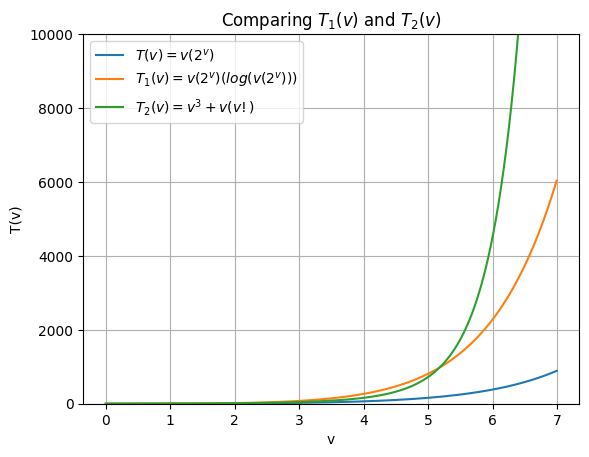

In [5]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

def T(v):
  return v * 2**v

def T1(v):
  return v * 2**v * np.log(v * 2**v)

def T2(v):
  if np.any(v != np.floor(v)):
    # Calculate factorial using gamma function for non-integer v
    return v**3 + v * gamma(v + 1)
  else:
    # Calculate factorial using np.math.factorial for integer v
    return v**3 + v * np.math.factorial(v.astype(int))

v = np.arange(0, 7, 0.01)

plt.plot(v, T(v), label='$T(v) = v(2^v)$')
plt.plot(v, T1(v), label='$T_1(v) = v(2^v)(log(v(2^v)))$')
plt.plot(v, T2(v), label='$T_2(v) = v^3 + v(v!)$')
plt.ylim(0, 10000)
plt.xlabel('v')
plt.ylabel('T(v)')
plt.title('Comparing $T_1(v)$ and $T_2(v)$')
plt.legend()
plt.grid()
plt.show()

Based on the plotted comparison graph, the time complexity of chosen algorithm has the lowest growth rate, while Brute Force Approach exceeds time complexity of Dijkstra Approach as the number of nodes (vertices) `v` exceeds approximately 5.1.

### Source:
1. [Shortest Path Visiting All Nodes](https://leetcode.com/problems/shortest-path-visiting-all-nodes/description/)
2. [Finding the Shortest Path in a Graph Visiting All Nodes](https://www.baeldung.com/cs/shortest-path-visiting-all-nodes)